In [1]:
from astropy.io import fits
from radio_beam import Beam
from astropy.wcs import WCS
from radio_beam import Beams
from astropy.convolution import convolve
from spectral_cube import SpectralCube

W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'
w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'




1.834915743934e-05


1.834915743934e-05
1.834915743934e-05


1.834915743934e-05
1.834915743934e-05


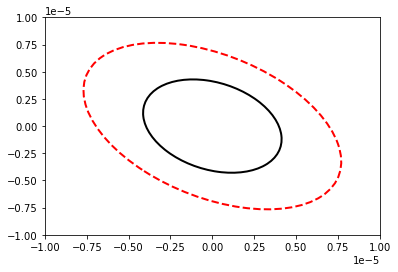

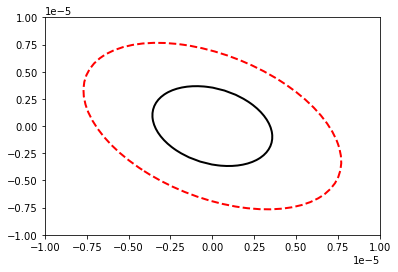

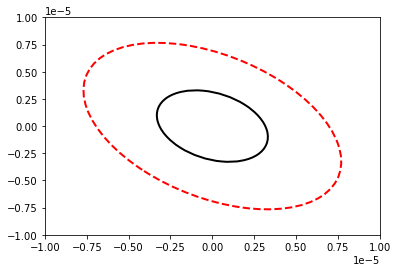

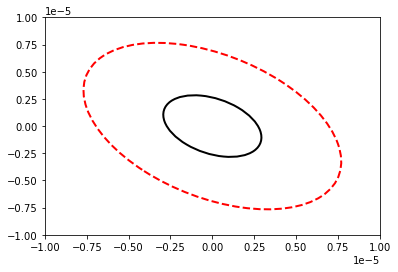

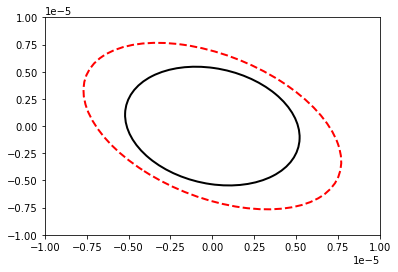

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

labelset=['briggs','robust0','uniform','superuniform','natural']
fileset =[w51n_b6_briggs,w51n_b6_robust0,w51n_b6_uniform,w51n_b6_superuniform,w51n_b6_natural]
for i, file in enumerate(fileset):
    fitsdata_b3 = SpectralCube.read(w51n_b3_tt0)
    fitsdata_b6 = SpectralCube.read(file)
    fitsdata_b3.allow_huge_operations=True
    fitsdata_b6.allow_huge_operations=True

    hdrNB6 = fits.getheader(file)  
    hdrNB3 = fits.getheader(w51n_b3_tt0)  
    wcsNB3 = WCS(hdrNB3,naxis=2)
    wcsNB6 = WCS(hdrNB6,naxis=2)

    my_beamNB3 = Beam.from_fits_header(hdrNB3)
    my_beamNB6 = Beam.from_fits_header(hdrNB6)
    
    plt.figure()
    ax = plt.gca()
    print(my_beamNB3.major.value)
    ellipse = Ellipse(xy=(0,0), width=my_beamNB3.major.value, height=my_beamNB3.minor.value, 
                            angle=my_beamNB3.pa.value, edgecolor='r', fc='None', lw=2 ,ls='dashed')
    ellipse2 = Ellipse(xy=(0,0), width=my_beamNB6.major.value, height=my_beamNB6.minor.value, 
                            angle=my_beamNB6.pa.value, edgecolor='k', fc='None', lw=2)
    ax.add_patch(ellipse)
    ax.add_patch(ellipse2)

    ax.set_xlim(-1e-5,1e-5)
    ax.set_ylim(-1e-5,1e-5)

In [6]:
labelset=['briggs','robust0','uniform','superuniform','natural']
fileset =[w51n_b6_briggs,w51n_b6_robust0,w51n_b6_uniform,w51n_b6_superuniform,w51n_b6_natural]
labelset=['briggs','robust0','uniform','superuniform']
fileset =[w51e2_b6_briggs,w51e2_b6_robust0,w51e2_b6_uniform,w51e2_b6_superuniform]
for i, file in enumerate(fileset):
    fitsdata_b6 = fits.open(file)
    image_b6 = fitsdata_b6[0].data[0][0]
    #print(image_b6)

    #fitsdata_b3.allow_huge_operations=True
    #fitsdata_b6.allow_huge_operations=True

    hdrNB6 = fits.getheader(file)  
    hdrNB3 = fits.getheader(w51n_b3_tt0)  
    wcsNB6 = WCS(hdrNB6,naxis=2)

    my_beamNB3 = Beam.from_fits_header(hdrNB3)
    my_beamNB6 = Beam.from_fits_header(hdrNB6)
    
    scaleNB6 = wcsNB6.proj_plane_pixel_scales()[0]
    beamsN =  Beams(beams=[my_beamNB3,my_beamNB6])
    
    common_beam = beamsN.common_beam()
  #  print(hdrNB6['BMAJ'])
    hdrNB6['BMAJ'] = common_beam.major.value
    hdrNB6['BMIN'] = common_beam.minor.value
    hdrNB6['BPA'] = common_beam.pa.value
  #  print(hdrNB6['BMAJ'])
    area_rat_B3 = (common_beam.sr/my_beamNB3.sr).value
    print(area_rat_B3)
    area_rat_B6 = (common_beam.sr/my_beamNB6.sr).value
    print(area_rat_B6)
    #kernelB6 = common_beam.deconvolve(my_beamNB6).as_kernel(scaleNB6)
    
   # conv_B6 = convolve(image_b6, kernelB6,preserve_nan=True)
    


    
    #area_rat_B6 = (common_beam.sr/my_beamNB6.sr).value
    
    #conv_B6_corr = conv_B6 * area_rat_B6

    
    #fits.writeto('/orange/adamginsburg/w51/TaehwaYoo/convolved_new/w51e2_cont_bigbriggs.image.convB3_%s.fits'%labelset[i], conv_B6, hdrNB6, overwrite = True)


    """
    gauss_kernNB3 = beamsN.common_beam().as_kernel(scaleNB6)
    area_ratN = (beamsN.common_beam().sr/my_beamNB6.sr).value
    data_2D_B6 = fitsdata_b6[0].data[0][0]
    convolved_NB6_NB3 = convolve(data_2D_B6, gauss_kernNB3)
    convolved_NB6_NB3_adj = convolved_NB6_NB3*area_ratN
    fits.writeto('/orange/adamginsburg/w51/TaehwaYoo/convolved/w51n_cont_bigbriggs.image.convB3_%s.fits'%labelset[i], convolved_NB6_NB3_adj, hdrNB6, overwrite = True)

    gauss_kernNB6 = beamsN.common_beam().as_kernel(scaleNB3)
    area_ratN = (beamsN.common_beam().sr/my_beamNB3.sr).value
    data_2D_B3 = fitsdata_b3[0].data[0][0]
    convolved_NB3_NB6 = convolve(data_2D_B3, gauss_kernNB6)
    convolved_NB3_NB6_adj = convolved_NB3_NB6*area_ratN
    fits.writeto('/orange/adamginsburg/w51/TaehwaYoo/convolved/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.convB6_%s.fits'%labelset[i], convolved_NB3_NB6_adj, hdrNB3, overwrite = True)
    """



1.0
3.238538472560882
1.0
4.4365762941109335
1.0
5.17474405016527
1.0
6.746687741319477
